In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
import time
import warnings
import gc, sys
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
# read the input data
raw_data = pd.read_csv('yellow_tripdata_2019-07.csv')
print("There are " + str(len(raw_data)) + " observations in the dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display first rows in the dataset
raw_data.head()

There are 6310419 observations in the dataset.
There are 18 variables in the dataset.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,1.0,N,193,193,1.0,2.5,0.5,0.5,1.14,0.00,0.3,4.94,0.0
1,2.0,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,1.0,N,234,25,2.0,16.5,0.5,0.5,0.00,0.00,0.3,20.30,2.5
2,1.0,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,2.0,N,132,42,1.0,52.0,0.0,0.5,11.75,6.12,0.3,70.67,0.0
3,2.0,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,2.0,N,132,142,1.0,52.0,0.0,0.5,11.06,0.00,0.3,66.36,2.5
4,1.0,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,1.0,N,107,114,1.0,9.5,3.0,0.5,2.00,0.00,0.3,15.30,2.5


In [3]:
visual_data = raw_data

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310419 entries, 0 to 6310418
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 866.6+ MB


In [5]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.276460e+06,6.276460e+06,6.310419e+06,6.276460e+06,6.310419e+06,6.310419e+06,6.276460e+06,6.310419e+06,6.310419e+06,6.310419e+06,6.310419e+06,6.310419e+06,6.310419e+06,6.310419e+06,6.310419e+06
mean,1.647390e+00,1.572045e+00,3.110132e+00,1.061235e+00,1.616448e+02,1.597920e+02,1.305580e+00,1.361008e+01,1.163916e+00,4.936708e-01,2.183854e+00,4.055411e-01,2.984449e-01,1.961230e+01,2.260082e+00
std,4.881620e-01,1.214311e+00,4.065832e+00,7.495861e-01,6.566174e+01,7.009963e+01,4.877842e-01,1.311566e+01,1.277882e+00,6.457269e-02,2.875575e+00,1.890058e+00,2.903123e-02,1.581046e+01,7.495733e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-7.000000e+00,-5.000000e-01,-2.210000e+02,-3.324000e+01,-3.000000e-01,-4.508000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.476000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.190000e+00,1.000000e+00,2.310000e+02,2.320000e+02,2.000000e+00,1.500000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.130000e+01,2.500000e+00
max,4.000000e+00,9.000000e+00,3.115600e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.666650e+03,1.850000e+01,6.800000e+00,4.195600e+02,1.559120e+03,3.000000e-01,6.667450e+03,2.750000e+00


In [6]:
raw_data.isna().sum()

VendorID                 33959
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          33959
trip_distance                0
RatecodeID               33959
store_and_fwd_flag       33959
PULocationID                 0
DOLocationID                 0
payment_type             33959
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [7]:
raw_data = raw_data.dropna()

In [8]:
raw_data.duplicated().sum() # There is only 1 duplicated rows

1

In [9]:
raw_data.memory_usage(deep=True)

Index                     50211680
VendorID                  50211680
tpep_pickup_datetime     477010960
tpep_dropoff_datetime    477010960
passenger_count           50211680
trip_distance             50211680
RatecodeID                50211680
store_and_fwd_flag       364034680
PULocationID              50211680
DOLocationID              50211680
payment_type              50211680
fare_amount               50211680
extra                     50211680
mta_tax                   50211680
tip_amount                50211680
tolls_amount              50211680
improvement_surcharge     50211680
total_amount              50211680
congestion_surcharge      50211680
dtype: int64

In [10]:
nRow, nCol = raw_data.shape

In [11]:
print(len(raw_data[raw_data['trip_distance'] == 0]), 'people who trip distance is 0')
print(len(raw_data[raw_data['trip_distance'] == 0]) / nRow) 
raw_data = raw_data[raw_data['trip_distance'] > 0]
print('Dropped all trip_distance <= 0')

67358 people who trip distance is 0
0.010731845658221354
Dropped all trip_distance <= 0


In [12]:
print(len(raw_data[raw_data['improvement_surcharge'] != 0.3]), 'surcharge that should have been $0.3')
print(len(raw_data[raw_data['improvement_surcharge'] != 0.3]) / nRow)
raw_data = raw_data[raw_data['improvement_surcharge'] == 0.3]
print('Dropped all corrupted data')

12337 surcharge that should have been $0.3
0.001965598442434111
Dropped all corrupted data


In [13]:
print(raw_data['payment_type'].unique())
raw_data = pd.get_dummies(raw_data, columns=['payment_type'])

[2. 1. 4. 3.]


In [14]:
print(raw_data['store_and_fwd_flag'].unique())
raw_data = pd.get_dummies(raw_data, columns=['store_and_fwd_flag'])

['N' 'Y']


In [15]:
print(raw_data['RatecodeID'].unique())
print(len(raw_data[raw_data['RatecodeID'] == 99]), 'there are. We should not have data in the form of 99')
raw_data = raw_data[raw_data['RatecodeID'] != 99]
print(raw_data['RatecodeID'].unique())
raw_data = pd.get_dummies(raw_data, columns=['RatecodeID'])

[ 1.  2.  3.  4.  5. 99.  6.]
134 there are. We should not have data in the form of 99
[1. 2. 3. 4. 5. 6.]


In [16]:
raw_data['tolal_non_trip_extra_fares'] = raw_data['extra'] + raw_data['mta_tax'] + raw_data['tolls_amount'] + raw_data['improvement_surcharge']

In [17]:
print(raw_data['VendorID'].unique())
print(len(raw_data[raw_data['VendorID'] == 4]), 'there are. We should not have data in the form of 4')
raw_data = raw_data[raw_data['VendorID'] != 4]
print(raw_data['VendorID'].unique())
raw_data = pd.get_dummies(raw_data, columns=['VendorID'])

[2. 1. 4.]
10397 there are. We should not have data in the form of 4
[2. 1.]


In [18]:
print(raw_data['mta_tax'].unique())
print(len(raw_data[raw_data['mta_tax'] == 0]))
print(len(raw_data[raw_data['mta_tax'] == 0]) / nRow)
raw_data = raw_data[raw_data['mta_tax'] != 0]
raw_data = raw_data.drop(['mta_tax'], axis=1) # all mta_tax data are equal

[0.5 0. ]
24326
0.003875751617950246


In [19]:
print(raw_data['improvement_surcharge'].unique())
raw_data = raw_data.drop(['improvement_surcharge'], axis=1) # all improvement_surcharge data are equal

[0.3]


In [20]:
print(raw_data['extra'].unique())

[ 0.5   0.    3.    2.5   3.5   1.    4.5   7.    2.   -0.5   0.8   5.5
  9.5   2.05  0.3   7.22  2.15  2.25  2.8   2.1   4.    3.8   3.1   5.
  3.3 ]


In [21]:
zone_data = pd.read_csv('taxi+_zone_lookup.csv')
print("There are " + str(len(zone_data)) + " observations in the dataset.")
print("There are " + str(len(zone_data.columns)) + " variables in the dataset.")
zone_data = zone_data.dropna()
zone_data.head()

There are 265 observations in the dataset.
There are 4 variables in the dataset.


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [22]:
raw_data = raw_data[raw_data['PULocationID'] < 263]

In [23]:
raw_data = pd.merge(left=raw_data, right=zone_data, how='inner', left_on='PULocationID', right_on='LocationID')

In [24]:
print(raw_data['service_zone'].unique())
raw_data = pd.get_dummies(raw_data, columns=['service_zone'])

['Yellow Zone' 'Airports' 'Boro Zone' 'EWR']


In [25]:
raw_data = raw_data.drop(['LocationID'], axis=1)

In [26]:
print(len(raw_data['Zone'].unique()))
raw_data = raw_data.drop(['Zone'], axis=1)

257


In [27]:
print(len(raw_data['Borough'].unique()))
raw_data = pd.get_dummies(raw_data, columns=['Borough'])

6


In [28]:
filtered_zone_data = zone_data[['LocationID', 'Borough']]
raw_data = pd.merge(left=raw_data, right=filtered_zone_data, how='inner', left_on='PULocationID', right_on='LocationID')
raw_data = pd.merge(left=raw_data, right=filtered_zone_data, how='inner', left_on='DOLocationID', right_on='LocationID')

In [29]:
raw_data = raw_data.drop(['LocationID_x'], axis=1)
raw_data = raw_data.drop(['LocationID_y'], axis=1)

In [30]:
raw_data['travel_to_out_borough'] = raw_data['Borough_x'] != raw_data['Borough_y']

In [31]:
raw_data = raw_data.drop(['extra'], axis=1)
raw_data = raw_data.drop(['tolls_amount'], axis=1)

In [32]:
raw_data = raw_data.drop(['Borough_x'], axis=1)
raw_data = raw_data.drop(['Borough_y'], axis=1)
raw_data = raw_data.drop(['PULocationID'], axis=1)
raw_data = raw_data.drop(['DOLocationID'], axis=1)

In [33]:
raw_data['congestion_surcharge'].unique()

array([2.5 , 0.  , 0.75, 2.75])

In [34]:
raw_data['congestion_surcharge'].value_counts()

congestion_surcharge
2.50    5546744
0.00     448982
0.75         65
2.75          1
Name: count, dtype: int64

In [35]:
raw_data = raw_data[(raw_data['congestion_surcharge'] == 2.5) | (raw_data['congestion_surcharge'] == 0)]

In [36]:
raw_data['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    5546744
0.0     448982
Name: count, dtype: int64

In [37]:
raw_data.loc[ raw_data['congestion_surcharge'] == 2.5, 'taked_congestion_surcharge'] = True
raw_data.loc[ raw_data['congestion_surcharge'] == 0, 'taked_congestion_surcharge'] = False

In [38]:
raw_data = raw_data.drop(['congestion_surcharge'], axis=1)

In [39]:
raw_data['tpep_pickup_datetime'] = pd.to_datetime(raw_data['tpep_pickup_datetime'])
raw_data['tpep_dropoff_datetime'] = pd.to_datetime(raw_data['tpep_dropoff_datetime'])

raw_data['trip_minute'] = (raw_data['tpep_dropoff_datetime'] - raw_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [40]:
raw_data['is_it_the_weekend'] = raw_data['tpep_pickup_datetime'].apply(lambda x: x.weekday() >= 5)

In [41]:
raw_data['is_it_night'] = (raw_data['tpep_pickup_datetime'].dt.hour >= 21) | (raw_data['tpep_pickup_datetime'].dt.hour < 6)

In [42]:
raw_data = raw_data.drop(['tpep_pickup_datetime'], axis=1)
raw_data = raw_data.drop(['tpep_dropoff_datetime'], axis=1)

In [43]:
print(len(raw_data[(raw_data['tip_amount'] > raw_data['fare_amount'])]), 'people tipped more than the travel fare')
raw_data = raw_data[(raw_data['tip_amount'] < raw_data['fare_amount'])]

4341 people tipped more than the travel fare


In [44]:
print(len(raw_data[(raw_data['payment_type_2.0'] == True) & (raw_data['tip_amount'] != 0)]),'people tipped even though they paid in cash')

139 people tipped even though they paid in cash


In [45]:
print(len(raw_data[raw_data['payment_type_2.0'] == True]), "It's sad, but we don't have tip data for those who pay in cash.")
raw_data = raw_data[raw_data['payment_type_2.0'] == False]
raw_data = raw_data.drop(['payment_type_2.0'], axis=1)

1720730 It's sad, but we don't have tip data for those who pay in cash.


In [46]:
raw_data = raw_data.drop(['total_amount'], axis=1) # this data also includes tips, so

In [47]:
raw_data.passenger_count.value_counts()

passenger_count
1.0    3021377
2.0     635463
3.0     177388
5.0     172389
6.0     103482
0.0      80091
4.0      79649
7.0          3
8.0          2
9.0          2
Name: count, dtype: int64

In [48]:
pas_median = raw_data[raw_data['passenger_count'] != 0].passenger_count.median()
raw_data['passenger_count'] = raw_data['passenger_count'].apply(lambda x: pas_median if x == 0 else x)

In [49]:
raw_data # final form of data

,passenger_count,trip_distance,fare_amount,tip_amount,payment_type_1.0,payment_type_3.0,payment_type_4.0,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,...,Borough_Brooklyn,Borough_EWR,Borough_Manhattan,Borough_Queens,Borough_Staten Island,travel_to_out_borough,taked_congestion_surcharge,trip_minute,is_it_the_weekend,is_it_night
1,1.0,18.80,52.0,11.75,True,False,False,True,False,False,...,False,False,False,True,False,True,False,35.783333,False,True
2,1.0,18.46,52.0,11.06,True,False,False,True,False,False,...,False,False,False,True,False,True,True,41.916667,False,True
3,1.0,1.70,9.5,2.00,True,False,False,True,False,True,...,False,False,True,False,False,False,True,12.166667,False,True
4,1.0,2.10,10.0,2.75,True,False,False,True,False,True,...,False,False,True,False,False,False,True,12.316667,False,True
5,1.0,2.40,13.0,3.35,True,False,False,True,False,True,...,False,False,True,False,False,False,True,22.850000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995785,2.0,0.96,5.5,0.00,True,False,False,True,False,True,...,False,False,True,False,False,False,True,4.866667,False,True
5995786,1.0,2.41,10.5,2.86,True,False,False,True,False,True,...,False,False,True,False,False,False,True,12.650000,False,True
5995789,1.0,4.56,18.5,4.46,True,False,False,True,False,True,...,False,False,True,False,False,False,True,22.683333,False,True
5995790,3.0,3.63,14.5,2.00,True,False,False,True,False,True,...,False,False,True,False,False,False,True,17.600000,False,True


In [50]:
raw_data.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
       'payment_type_1.0', 'payment_type_3.0', 'payment_type_4.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'RatecodeID_1.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'RatecodeID_6.0', 'tolal_non_trip_extra_fares', 'VendorID_1.0',
       'VendorID_2.0', 'service_zone_Airports', 'service_zone_Boro Zone',
       'service_zone_EWR', 'service_zone_Yellow Zone', 'Borough_Bronx',
       'Borough_Brooklyn', 'Borough_EWR', 'Borough_Manhattan',
       'Borough_Queens', 'Borough_Staten Island', 'travel_to_out_borough',
       'taked_congestion_surcharge', 'trip_minute', 'is_it_the_weekend',
       'is_it_night'],
      dtype='object')

In [51]:
visual_data['tpep_pickup_datetime'] = pd.to_datetime(visual_data['tpep_pickup_datetime'])
visual_data['tpep_dropoff_datetime'] = pd.to_datetime(visual_data['tpep_dropoff_datetime'])

In [52]:
visual_data['date'] = visual_data['tpep_pickup_datetime'].dt.date
visual_data['month'] = visual_data['tpep_pickup_datetime'].dt.month
visual_data['day'] = visual_data['tpep_pickup_datetime'].dt.day
visual_data['weekday'] = visual_data['tpep_pickup_datetime'].dt.weekday
visual_data['hr'] = visual_data['tpep_pickup_datetime'].dt.hour

In [53]:
visual_data = visual_data[visual_data['month'] == 7]

In [54]:
visual_data['duration'] = visual_data['tpep_dropoff_datetime'] - visual_data['tpep_pickup_datetime']
visual_data['duration'] = visual_data['duration'] / np.timedelta64(1, 'm')

In [55]:
# visual_data[visual_data['duration'] <= 0].sort_values('duration')

In [56]:
hours_df = visual_data.groupby(['hr', 'date'], as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_rides'}, axis=1) \
    .groupby('hr', as_index=False)['total_rides'] \
    .agg({'total_rides' : 'mean'}) \
    .rename({'total_rides' : 'average_rides'}, axis=1)

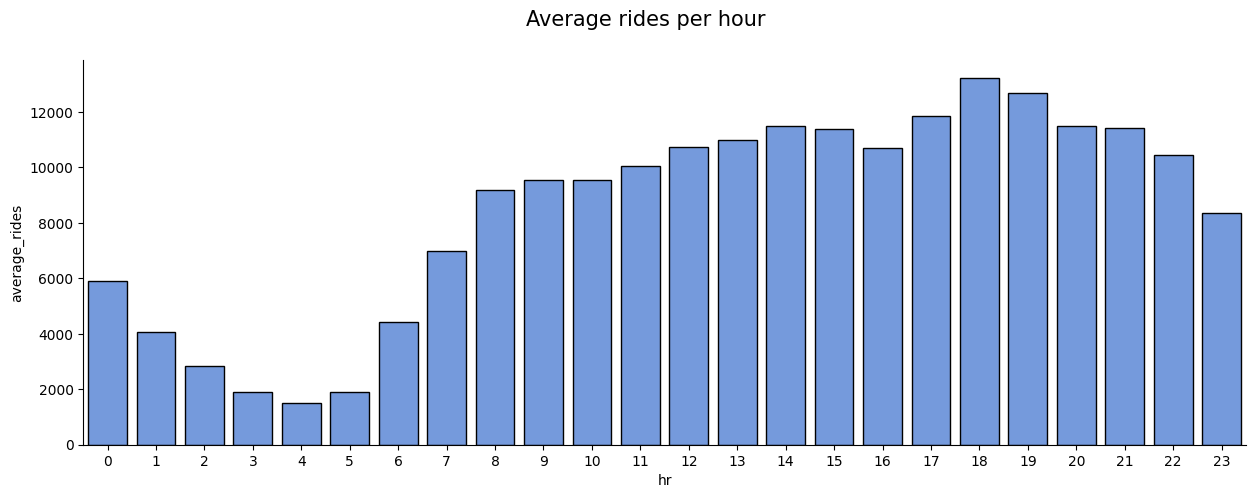

In [57]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=hours_df,
    x='hr',
    y='average_rides',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Average rides per hour', fontsize=15)
sns.despine()
plt.show()

In [58]:
days_df = visual_data.groupby('day', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_rides'}, axis=1)

round(days_df.total_rides.mean())

202457

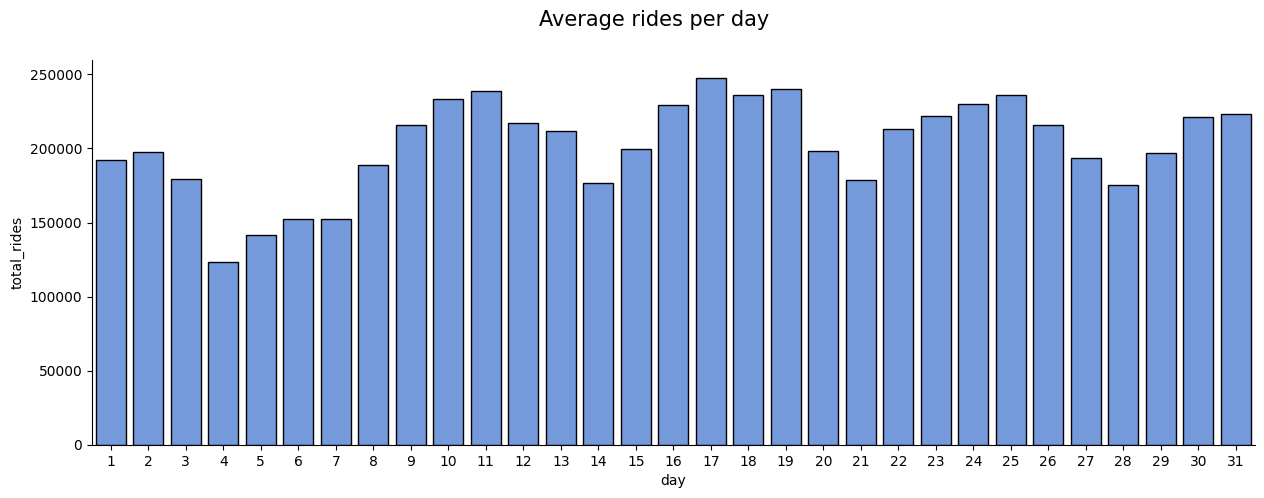

In [59]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=days_df,
    x='day',
    y='total_rides',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Average rides per day', fontsize=15)
sns.despine()
plt.show()

In [60]:
hours = visual_data.pivot_table(
    index='date',
    columns='hr',
    values='VendorID',
    aggfunc='count'
)

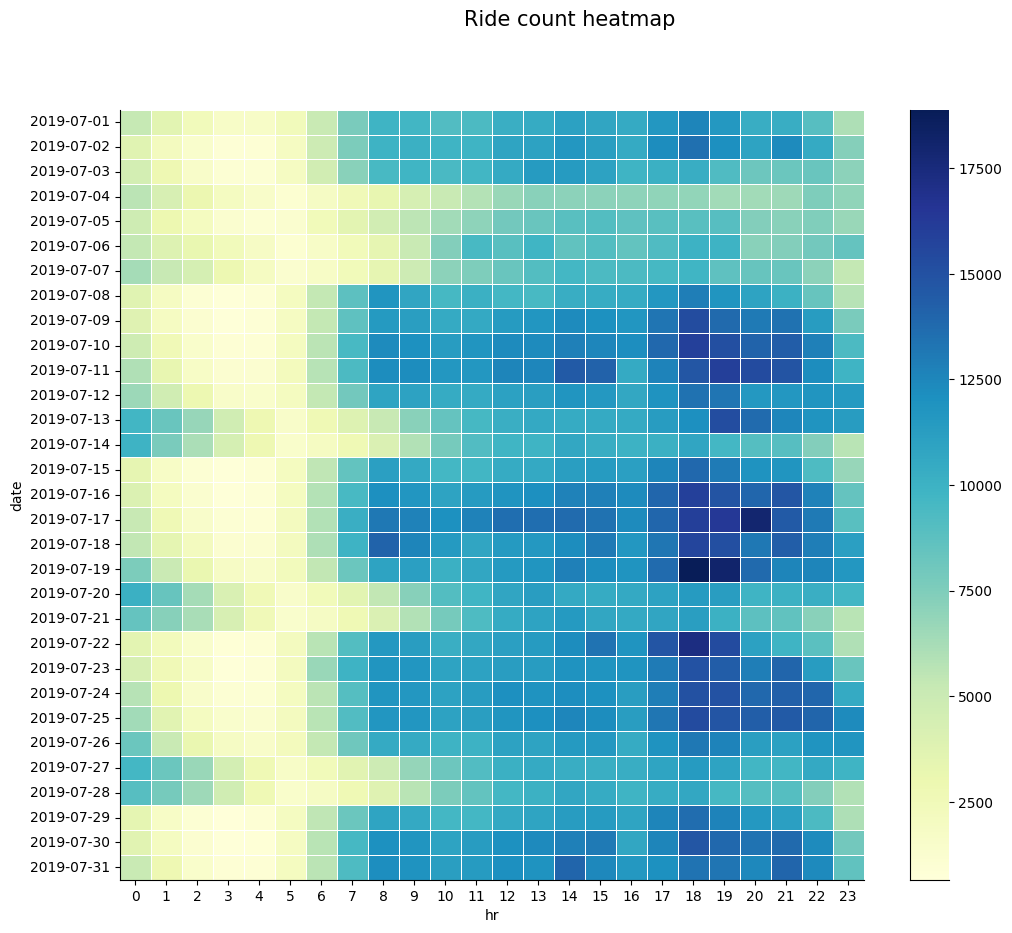

In [88]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=hours,
    fmt='.1%',
    linewidths=0.5,
    cmap="YlGnBu"
)
fig.suptitle('Ride count heatmap', fontsize=15)
sns.despine()
plt.show()

In [62]:
visual_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'date', 'month', 'day',
       'weekday', 'hr', 'duration'],
      dtype='object')

In [63]:
visual_data = visual_data[visual_data['tip_amount'] >= 0]

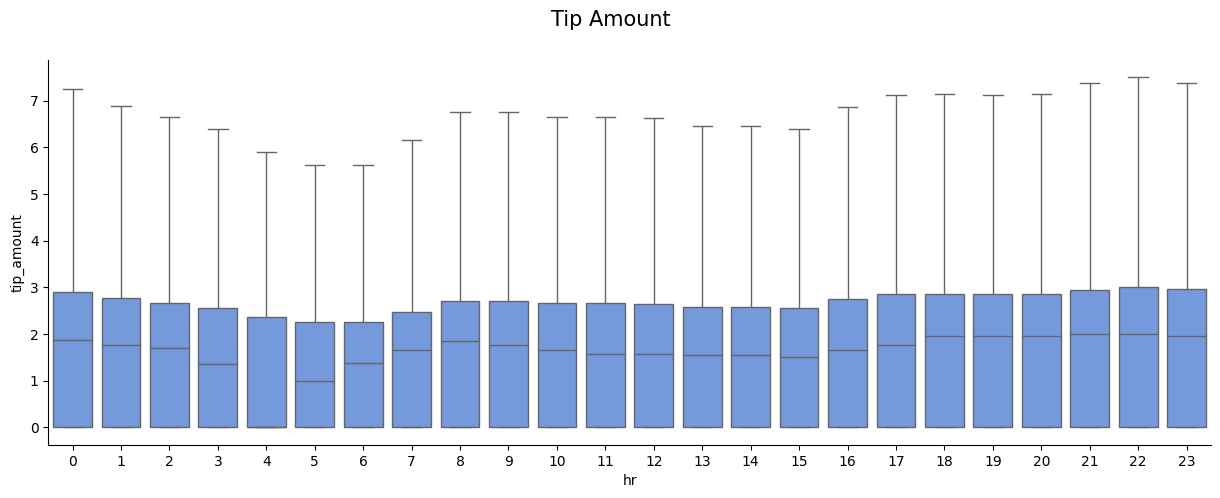

In [64]:
fig = plt.figure(figsize=(15, 5))
ax = sns.boxplot(
    data=visual_data[visual_data['tip_amount'] < 8],
    x='hr',
    y='tip_amount',
    color='cornflowerblue',
    showfliers = False
)
fig.suptitle('Tip Amount', fontsize=15)

sns.despine()
plt.show()

In [65]:
top10_pickup_districts = visual_data.groupby('PULocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)

In [66]:
top10_dropoff_districts = visual_data.groupby('DOLocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)

In [67]:
top10_pickup_districts = top10_pickup_districts.merge(
    zone_data,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

In [68]:
top10_dropoff_districts = top10_dropoff_districts.merge(
    zone_data,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

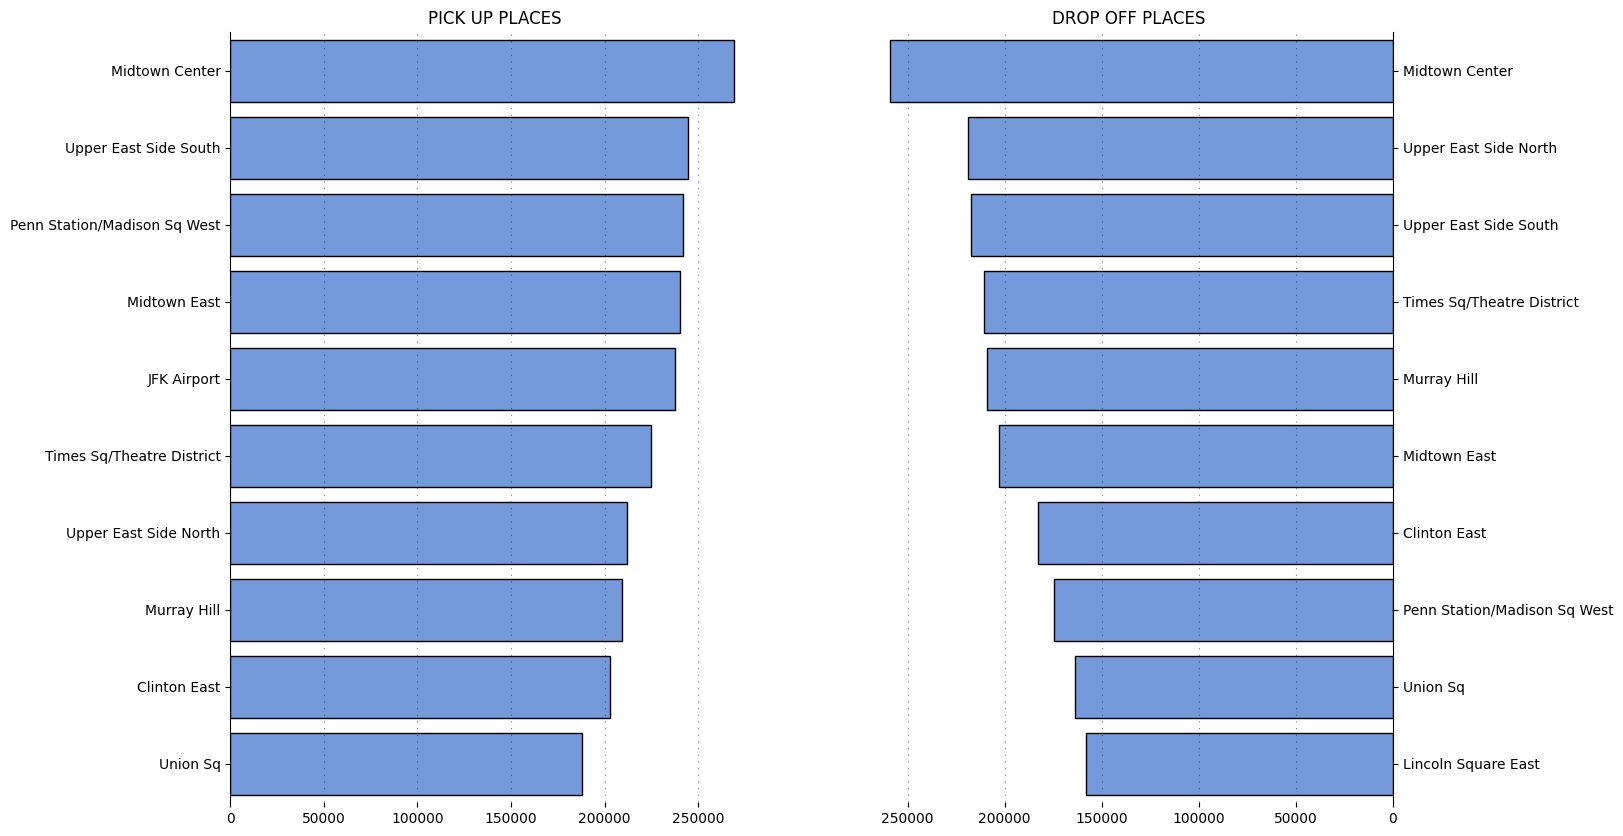

In [69]:
fig = plt.figure(figsize=(15, 10))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.barplot(
    data=top10_pickup_districts,
    x='count',
    y='Zone',
    color='cornflowerblue',
    edgecolor='black',
    ax=ax0
)

sns.barplot(
    data=top10_dropoff_districts,
    x='count',
    y='Zone',
    color='cornflowerblue',
    edgecolor='black',
    ax=ax1
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax0.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax1.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)

ax0.set_title('PICK UP PLACES')
ax1.set_title('DROP OFF PLACES')

ax0.set_ylabel('')
ax1.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom','left']:    
    ax1.spines[s].set_visible(False)
plt.show()

In [70]:
popular_directions = visual_data.groupby(['PULocationID', 'DOLocationID'], as_index=False)['VendorID'].count() \
    .dropna() \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(20)

In [71]:
popular_directions = popular_directions.merge(
    zone_data,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'pick_up_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1).merge(
    zone_data,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'drop_off_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1)

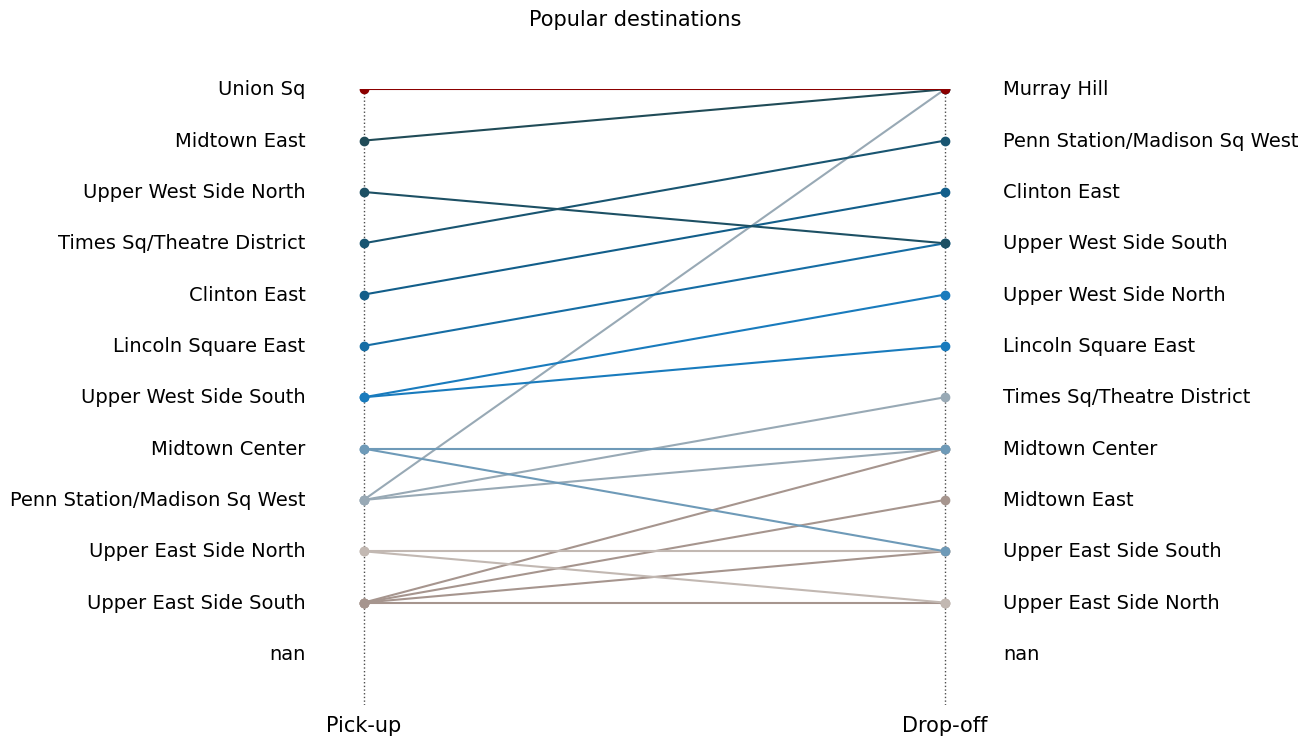

In [87]:
import matplotlib.lines as mlines
colors_list = ['#8A716A',
               '#A6958E',
               '#C2B8B2',
               '#98a9b5',
               '#6e9ab8',
               '#197bbd',
               '#166da4',
               '#125e8a',
               '#195571',
               '#1d5064',
               '#204b57',
               '#8b0000'
              ]
left_label = list(popular_directions.pick_up_nh.unique())
right_label = list(popular_directions.drop_off_nh.unique())

fig, ax = plt.subplots(1,1,figsize=(15,8), facecolor='white')

fig.suptitle('Popular destinations', fontsize=15)

ax.vlines(x=1, ymin=-1, ymax=12, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-1, ymax=12, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

for num, district in enumerate(left_label):
    ax.text(0.8, num, s=left_label[num], horizontalalignment='right', verticalalignment='center', fontdict={'size':14})

for num, district in enumerate(right_label):
    ax.text(3.2, num, s=right_label[num], horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

for num, district in enumerate(left_label):
    N = [i for i, x in enumerate(popular_directions.pick_up_nh) if x == left_label[num]]
    for i in N:
        d = popular_directions.drop_off_nh[i]
        j = right_label.index(d)
        ax = plt.gca()
        l = mlines.Line2D([1, 3], [num, j], marker='o', markersize=6, color=colors_list[num])
        ax.add_line(l)

ax.set(xlim=(0,4), ylim=(-1, 11), ylabel='')
ax.set_xticks([1,3])
ax.set_xticklabels(['Pick-up', 'Drop-off'],fontsize=15)
ax.tick_params(axis='both',which='both',left=False,bottom=False,labelleft=False) 

for s in ['top', 'bottom','left', 'right']:    
    ax.spines[s].set_visible(False)

plt.show()

In [73]:
ist_X = raw_data['is_it_night']
ist_y = raw_data['tip_amount']

model = sm.OLS(ist_y, ist_X).fit()
predictions = model.predict(ist_X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             tip_amount   R-squared (uncentered):                   0.150
Model:                            OLS   Adj. R-squared (uncentered):              0.150
Method:                 Least Squares   F-statistic:                          7.532e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:07:11   Log-Likelihood:                     -1.1534e+07
No. Observations:             4269846   AIC:                                  2.307e+07
Df Residuals:                 4269845   BIC:                                  2.307e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
is_it_night     3.0654      0.004    867.900      0.000       3.058       3.072
==============================================================================
Omnibus:                  3662982.237   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5073656448.232
Skew:                           2.860   Prob(JB):                         0.00
Kurtosis:                     171.776   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # filename = df.dataframeName
    # df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    # plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

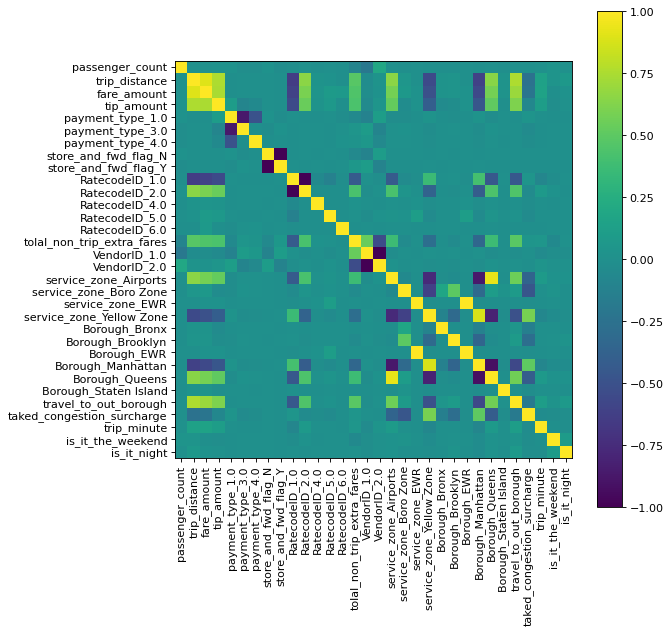

In [75]:
plotCorrelationMatrix(raw_data, 8)

In [89]:
clean_data = raw_data
del visual_data
del raw_data
gc.collect() # garbage collector

35134

In [91]:
X = clean_data.drop(columns=["tip_amount"])
y = clean_data["tip_amount"]

In [77]:
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (4269846, 32) y.shape= (4269846,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (3415876, 32) Y_train.shape= (3415876,)
X_test.shape= (853970, 32) Y_test.shape= (853970,)


In [79]:
from sklearn.tree import DecisionTreeRegressor

sklearn_dt = DecisionTreeRegressor(max_depth=32, random_state=35)

t0 = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  23.08925


In [80]:
from sklearn.metrics import mean_squared_error

sklearn_pred = sklearn_dt.predict(X_test)

# evaluate mean squared error on the test dataset
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
print('[Scikit-Learn] MSE score : {0:.3f}'.format(sklearn_mse))

[Scikit-Learn] MSE score : 3.285


In [81]:
from sklearn.metrics import mean_absolute_error

sklearn_mae = mean_absolute_error(y_test, sklearn_pred)
print('[Scikit-Learn] MaE score : {0:.3f}'.format(sklearn_mae))

[Scikit-Learn] MaE score : 0.955


In [82]:
history = []
for depth in range(4, 33, 4):
    sklearn_dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    t0 = time.time()
    sklearn_dt.fit(X_train, y_train)
    sklearn_time = time.time()-t0

    sklearn_pred = sklearn_dt.predict(X_test)

    sklearn_mae_ = mean_absolute_error(y_test, sklearn_pred)
    
    print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))
    print(depth, 'depth [Scikit-Learn] MAE score : {0:.3f}'.format(sklearn_mae_))
    history.append([depth, sklearn_time, sklearn_mae_])

[Scikit-Learn] Training time (s):  5.15624
4 depth [Scikit-Learn] MAE score : 0.891
[Scikit-Learn] Training time (s):  9.38365
8 depth [Scikit-Learn] MAE score : 0.821
[Scikit-Learn] Training time (s):  13.28162
12 depth [Scikit-Learn] MAE score : 0.810
[Scikit-Learn] Training time (s):  15.36815
16 depth [Scikit-Learn] MAE score : 0.813
[Scikit-Learn] Training time (s):  17.34237
20 depth [Scikit-Learn] MAE score : 0.828
[Scikit-Learn] Training time (s):  20.08409
24 depth [Scikit-Learn] MAE score : 0.860
[Scikit-Learn] Training time (s):  20.81987
28 depth [Scikit-Learn] MAE score : 0.904
[Scikit-Learn] Training time (s):  21.80220
32 depth [Scikit-Learn] MAE score : 0.955


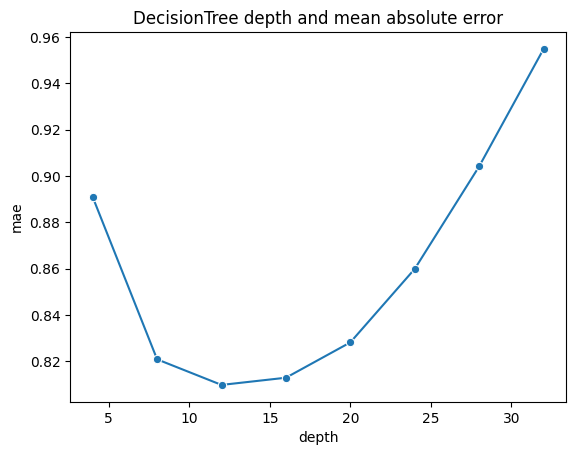

In [83]:
df = pd.DataFrame(history, columns=['depth', 'time', 'mae'])

sns.lineplot(data=df, x='depth', y='mae', marker='o')

plt.title('DecisionTree depth and mean absolute error')
plt.xlabel('depth')
plt.ylabel('mae')

plt.show()